hipotesis_ regimenes de deformaciones pequeñas. Entonces el módulo dinámico es igual al estático.

Despreciamos las deformaciones trasversales



In [1]:
import matplotlib
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal
import numpy as np
from scipy import fftpack
from scipy.signal import find_peaks  
import pandas as pd

In [2]:
def MakeSpectralPlot(y, Fs, fignum=1):
    
    yfft = fftpack.fft(y)
    N = len(y)
    xf = np.linspace(0, Fs/2, int(N/2))
    yf = 2.0/N * np.abs(yfft[:N//2])
    PosicionPicos, IntensidadPicos = find_peaks(yf, height=yf[0])
    print(PosicionPicos)
    print(IntensidadPicos)
#    VectorFrecuenciaPicos = [xf[i] for i in PosicionPicos]
    plt.figure(fignum)
    plt.clf()
    plt.semilogx(xf, yf)
    #plt.plot(xf,yf)
    plt.xlabel('Frecuencias (MHz)')
    plt.ylabel('Amplitud (AU)')
    plt.title('Descomposición espectral del ruido')
    #plt.xlim(1,10)
    return xf, yf


### Actividad 3.1

Calcular la transformada rápida de Fourier (FFT) de las siguientes funciones:

$v(t) = |cos(2 \pi f t)|$

$v(t) = |cos(2 \pi f t)| + 0.2$

$v(t) = |cos(2 \pi f t)| ^{2} + 0.2$

Para ello, deberán muestrear las funciones.
Evaluar el resultado del módulo de la FFT de acuerdo a distintas duraciones y
frecuencia de muestreo

[]
{'peak_heights': array([], dtype=float64)}
Frecuencia: 5.786133595407996


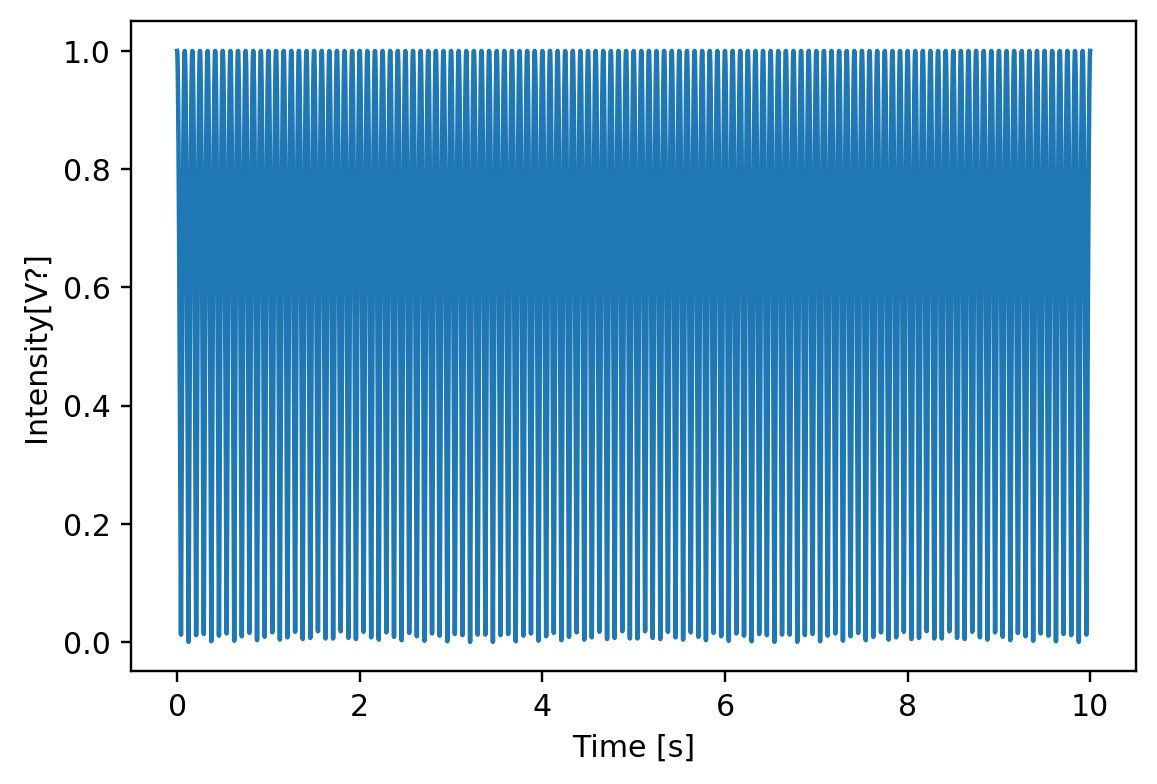

<Figure size 1944x1548 with 0 Axes>

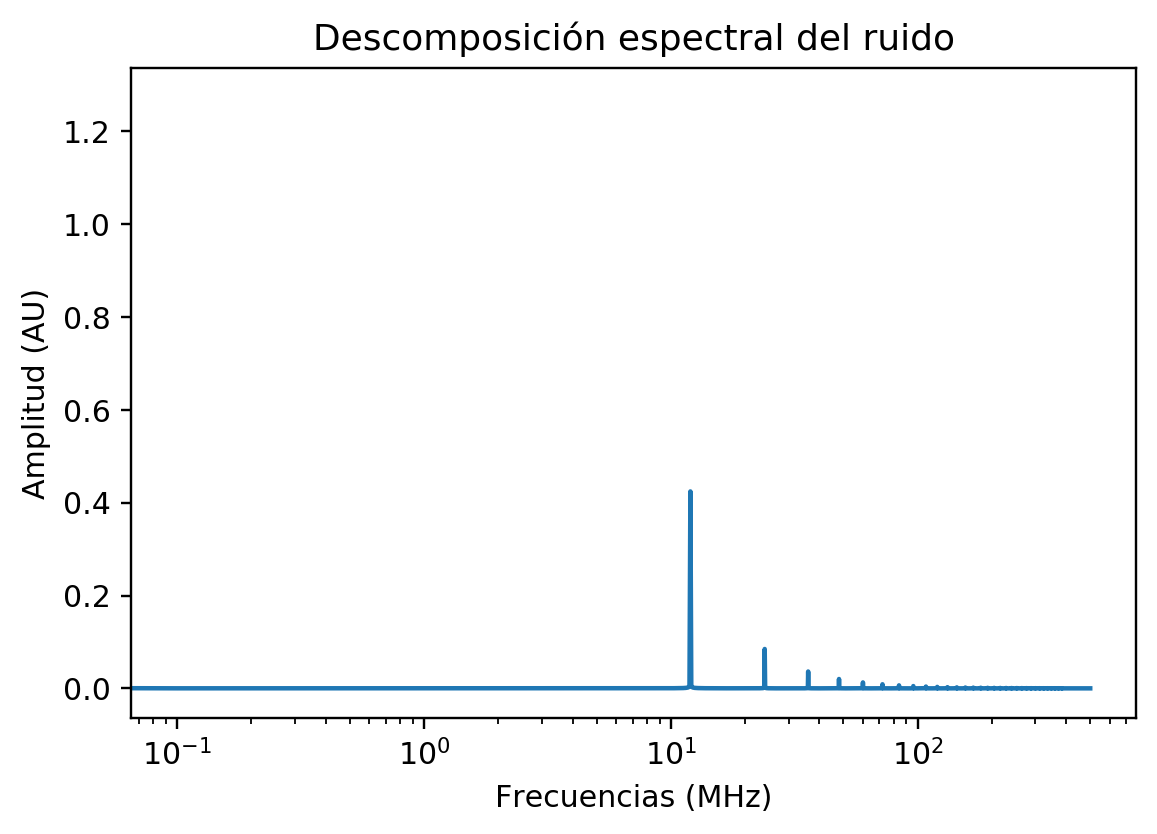

In [19]:
#matplotlib.use('TkAgg')
%matplotlib qt

t = np.linspace(0, 10, 10000)
tstep = max(t)/len(t)
fsamp = 1/tstep

f0 = 6

V = np.abs(np.cos(2*np.pi*f0*t)) 

plt.figure(2)
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
plt.figure(figsize = (9, 7.5))
MakeSpectralPlot(V, fsamp)

f_ = np.array(plt.ginput(2))
print(f'Frecuencia: {f_[0][0]/2}')

In [59]:
%matplotlib qt

t = np.linspace(0, 10, 10000)
tstep = max(t)/len(t)
fsamp = 1/tstep

f0 = 4

V = np.abs(np.cos(2*np.pi*f0*t)) + 0.2

plt.figure(2)
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
plt.figure(figsize = (9, 7.5))
MakeSpectralPlot(V, fsamp)

f_ = np.array(plt.ginput(2))
print(f'Frecuencia: {f_[0][0]/2}')

[]
{'peak_heights': array([], dtype=float64)}
Frecuencia: 3.960203012274784


In [60]:
%matplotlib qt

t = np.linspace(0, 10, 10000)
tstep = max(t)/len(t)
fsamp = 1/tstep

f0 = 4

V = np.abs(np.cos(2*np.pi*f0*t))**2 + 0.2

plt.figure(2)
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
plt.figure(figsize = (9, 7.5))
MakeSpectralPlot(V, fsamp)

f_ = np.array(plt.ginput(2))
print(f'Frecuencia: {f_[0][0]/2}')

[]
{'peak_heights': array([], dtype=float64)}
Frecuencia: 4.035716198892068


### Actividad 3.2

Generar una señal correspondiente a la vibración ideal sin amortiguamiento de
una barra en voladizo, considerando sus tres primero modos:

$ v(t) = A_{1} sin(\omega_1 t) + A_2 sin(\omega_2 t + \phi) + A_3 sin( \omega_3 t + \phi)$

Obtener una buena FFT. Identificar parametros de muestreo.

In [ ]:
t = np.linspace(0, 10, 10000)
tstep = max(t)/len(t)
fsamp = 1/tstep

A1 = 
A2 = 
A3 = 
w1 = 
w2 = 
w3 = 

V = A1 * np.sin(w1 *t) + A2 * np.sin(w2 *t + phi) + A3 * np.sin(A3 *t + phi)

plt.figure(2)
plt.clf()
plt.plot(t, V)
plt.xlabel('Time [s]')
plt.ylabel('Intensity[V?]')
plt.figure(figsize = (9, 7.5))
MakeSpectralPlot(V, fsamp)

f_ = np.array(plt.ginput(2))
print(f'Frecuencias: w1: {f_[0][0]}, w2: {f_[1][0]} , w3: {f_[2][0]}')

### Actividad 3.3
Se presentan distintas capturas de series temporales realizadas con un osciloscopio
que permitía registrar series de datos de 30k puntos. Las series corresponden a la
oscilación vertical libre de una barra en voladizo. 3 de las series corresponden a una
barra de acero y 4 a una barra de latón

Analizar las series y obtener el valor del módulo de Young de cada material.
Discutir la calidad de los datos al compararlos con una serie temporal ideal con
amortiguamiento:

http://materias.df.uba.ar/l4a2021c1/files/2021/03/actividades_clase_03.pdf

𝑣(𝑡) = ෍𝐴௜ 𝑒−𝜁𝜔𝑖𝑡 sin(𝜔𝑖,𝑑 𝑡 + 𝜑)

In [11]:
import os
import re 

frames = []
colors = ['Red','Green','Blue']
files = {os.path.splitext(k)[0]: {} for k in os.listdir('data') if 'acero' in os.path.splitext(k)[0] or 'laton' in os.path.splitext(k)[0]}

#guardo todos los rgb por imagen de la carpeta
for i,file in enumerate(os.listdir('data')):
    name = os.path.splitext(file)[0]
    if 'acero' in name or 'laton' in name:
        f = open(f'data/{file}').read().split()[7:]
        t = [float(f[i]) for i in range(0,len(f),2)]
        v = [float(f[i + 1]) for i in range(0,len(f),2)]
        files[name]['t'] = np.array(t)
        files[name]['v'] = np.array(v)

  

In [30]:
t = files['acero_1']['t']
v = files['acero_1']['v']

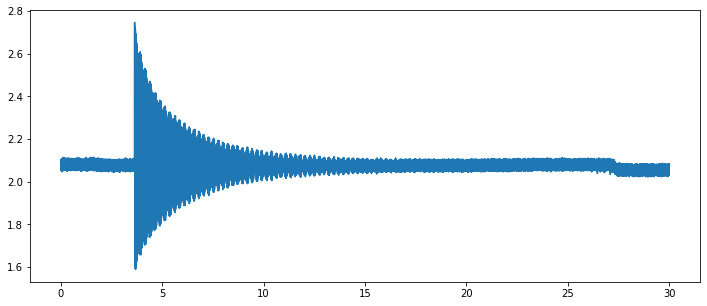

In [31]:
%matplotlib inline
plt.figure(figsize = (12,5))
plt.clf()
plt.plot(t,v)

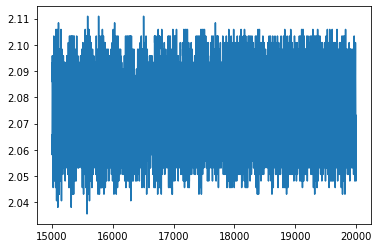

In [55]:
%matplotlib inline
t_ = np.where(np.logical_and(t>=15, t<20))[0]
v_ = v[15000:20000]
plt.plot(t_,v_)

[]
{'peak_heights': array([], dtype=float64)}
Frecuencia: 0.24997268601277398


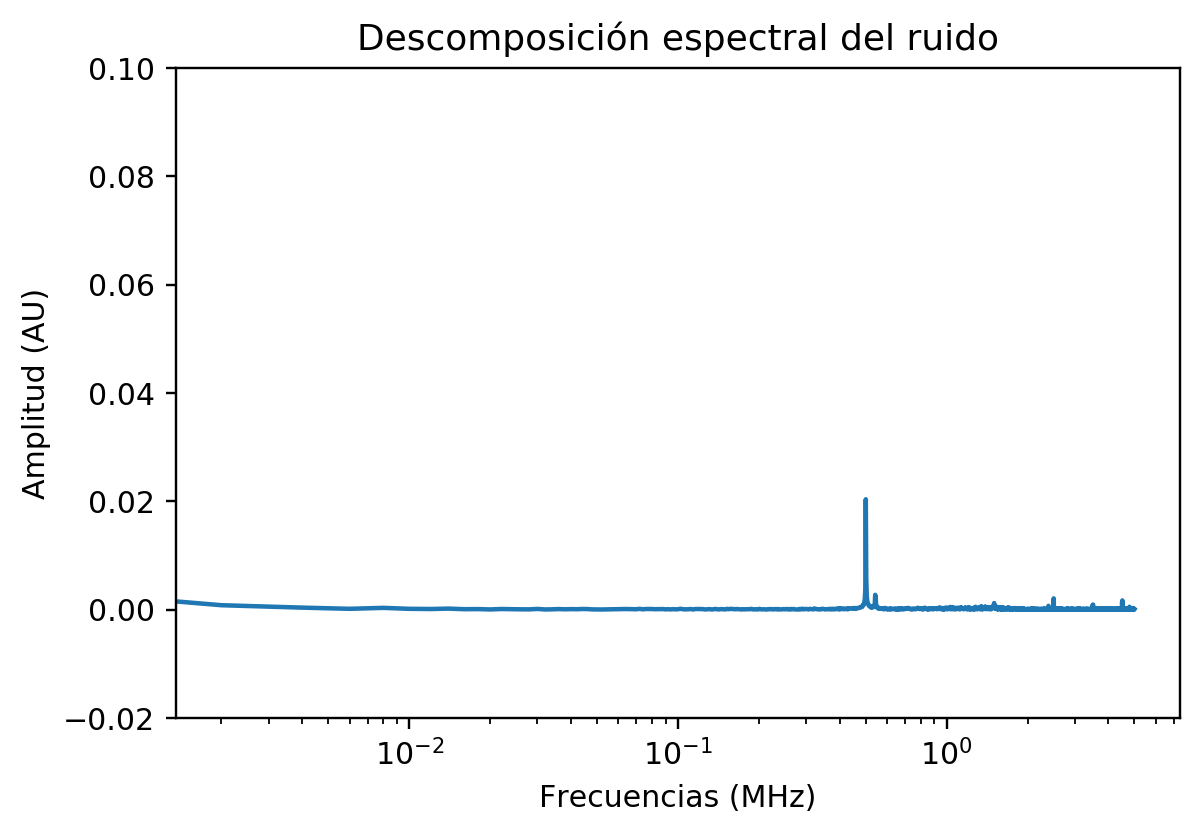

In [61]:
%matplotlib qt
fsamp = 1/0.1
MakeSpectralPlot(v_, fsamp)
plt.ylim(-0.02,0.1)

f_ = np.array(plt.ginput(2))
print(f'Frecuencia: {f_[0][0]/2}')

In [35]:
np.where(np.logical_and(t>15, t<17))

(array([15001, 15002, 15003, ..., 16997, 16998, 16999], dtype=int64),)